This notebook is based on an [example at the Scikit-Learn website](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html).

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

%matplotlib inline

In [2]:
np.set_printoptions(precision=4, linewidth=125)

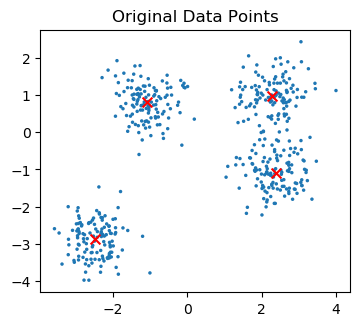

In [3]:
# Run this cell for 3 artificial clusters
N = 500
X, y_true = make_blobs(n_samples=N,
                  n_features=2,
                  centers=4,
                  cluster_std=0.5, # increase the standard deviation for less well-separated clusters
                  center_box=(-3, 3),
                  shuffle=True)

# Compute centers
cx = [np.mean(X[y_true==yy,0]) for yy in range(4)]
cy = [np.mean(X[y_true==yy,1]) for yy in range(4)]

# Plot 'em
fig = plt.figure(figsize=(4, 4), dpi=100)
ax = fig.add_subplot(1, 1, 1, aspect=1)
ax.scatter(X[:, 0], X[:, 1], marker='.', s=25, edgecolor='')
ax.scatter(cx, cy, marker='x', s=50, edgecolor='', c='red', linewidths=0)
ax.set_title('Original Data Points')
plt.show()

For K = 2, the average silhouette score is 0.558


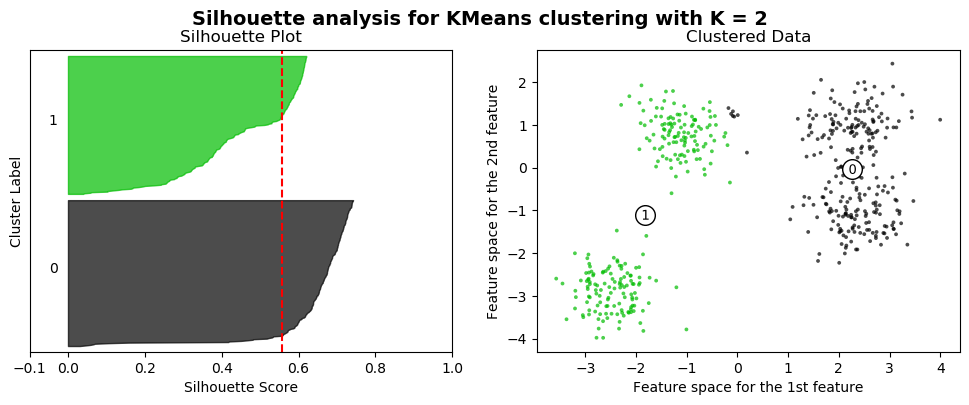

For K = 3, the average silhouette score is 0.673


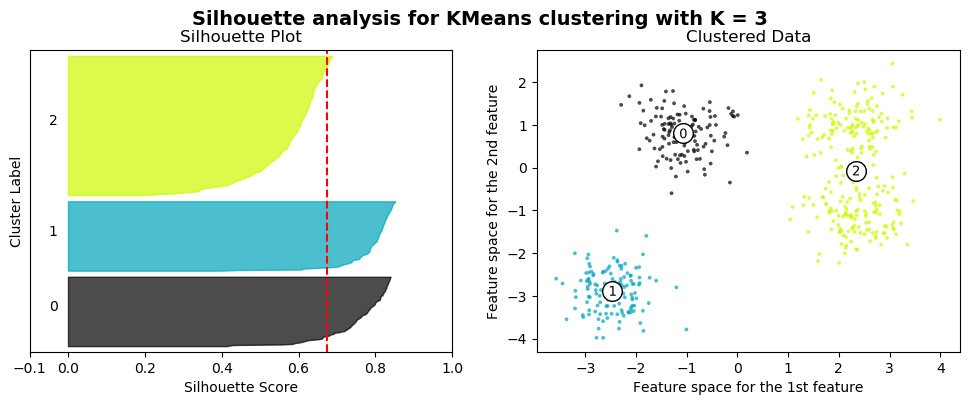

For K = 4, the average silhouette score is 0.675


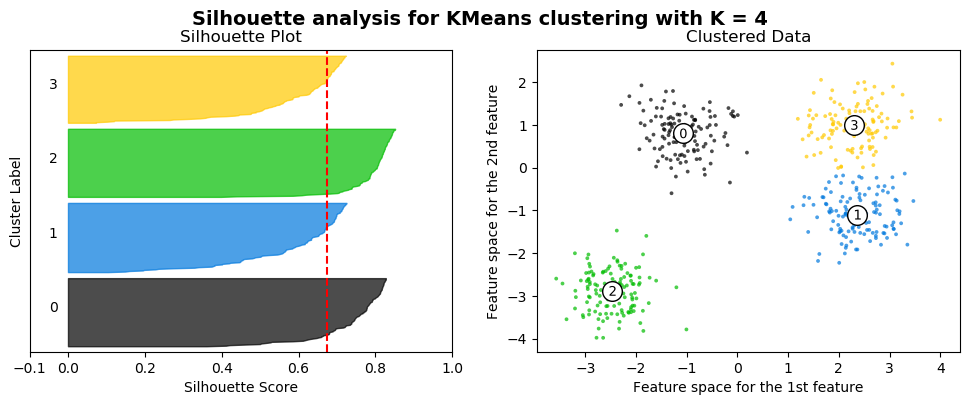

For K = 5, the average silhouette score is 0.604


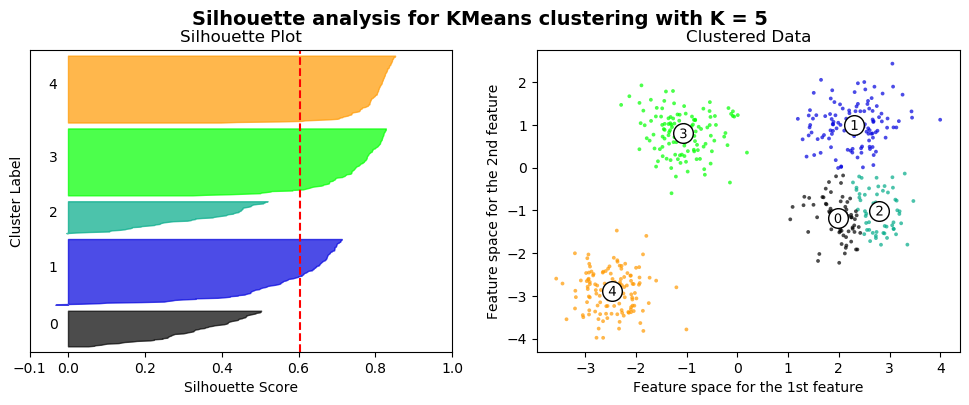

For K = 6, the average silhouette score is 0.476


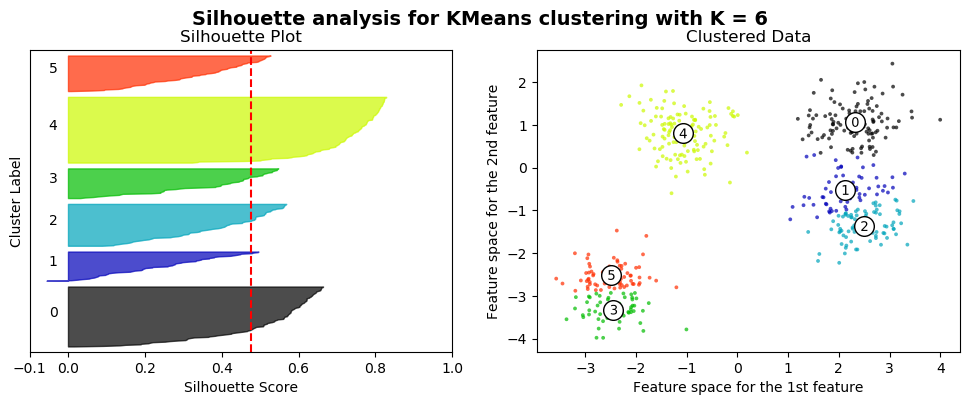

In [4]:
for K in range(2,7):
    
    # Cluster using Kmeans
    kmeans = KMeans(init='random', n_clusters=K)
    y = kmeans.fit_predict(X)

    # Create side-by-side plots
    fig = plt.figure(figsize=(12, 4), dpi=100)
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)

    # ------------------------------------------
    # The left subplot is the silhouette plot
    # ------------------------------------------

    ax1.set_xlim([-0.1, 1.0])
    vertical_spacing = (K+1)*10 # extra spacing to separate the silhouettes
    ax1.set_ylim([0, len(X) + vertical_spacing])

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(X, y)
    print("For K = {}, the average silhouette score is {:.3f}".format(K, silhouette_avg))

    # Compute the silhouette scores for each instance/sample/object
    sample_silhouette_values = silhouette_samples(X, y)

    y_lower = 10
    for i in range(K):
        # Aggregate and sort the silhouette scores for samples in cluster i
        ith_cluster_silhouette_values = sample_silhouette_values[y==i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # color setup
        color = cm.nipy_spectral(float(i) / K)

        # Fill the area between two curves
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
            0, ith_cluster_silhouette_values,
            facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Silhouette Plot")
    ax1.set_xlabel("Silhouette Score")
    ax1.set_ylabel("Cluster Label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # ------------------------------------------
    # The right plot shows the actual clusters formed
    # ------------------------------------------

    colors = cm.nipy_spectral(y.astype(float) / K)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # Mark the cluster centers
    centers = kmeans.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='+', c="black", alpha=1, s=200, edgecolor='k')

    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    
    # Label the cluster centers
    for i, c in enumerate(centers):
        cl = '${}$'.format(i)
        ax2.scatter(c[0], c[1], marker=cl, alpha=1, s=50, c='k', edgecolor='')

    ax2.set_title("Clustered Data")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle("Silhouette analysis for KMeans clustering with K = {}".format(K),
                 fontsize=14, fontweight='bold')

    plt.show()

### Interpreting the silhouette scores

* A silhouette score near $+1$ indicates that an object is far away from the neighboring clusters.
* A value of $0$ indicates that an object is on or very close to the decision boundary between neighboring clusters.
* Negative values indicate that an object may have been assigned to the wrong cluster.

### Interpreting cluster silhouette shape

* Globular clusters will yield "flatter" silhouettes -- that is, they'll show less variation along the right ragged edge.
* Non-globular clusters will yield sharp, icicle-like silhouettes. This could mean you've got too many clusters.
* The presence of silhouettes that fall entirely below the average suggest too many clusters.
* Silhouettes that aren't ideally shaped, but are all similar, may be the best we can do.